Likelihood Ratio Test Guide
---------------------------


### Introduction

The usual setting to learn Likelihood Ratio Test (LRT)/LR statistic is evaluting under the simple null hypothesis. Suppose that the parameter $\theta_0$ is the value of the parameter under the null hypothesis, and $\hat{\theta}$ is the MLE estimate of the parameter in question. The likelihood ratio test is a statistical test which measures the ratio of the two likelihood functions. 

<p align="center">
  <img width="400" height="250" src="https://stats.idre.ucla.edu/wp-content/uploads/2016/02/nested_tests.gif">
</p>

Visually, this ratio can be understood as the proportion of the heights of the two likelihood functions evaluated at each $\theta_0, \hat{\theta}$, where the likelihood function is the probability of the observed data given the parameter. 

$$
\begin{align*}
  \ell_0 &= L_0(x_1,\cdots, x_n; \theta_0) = \prod_{i=1}^{n} f(x_i|\theta_0) \\
  \ell_1 &= L_1(x_1,\cdots, x_n; \hat{\theta}) = \prod_{i=1}^{n} f(x_i|\hat{\theta})
\end{align*}
$$

To perform the LRT, we choose a constant $c$ such that the likelihood ratio test statistic $\lambda$ is defined as:

$$
\begin{align*}
  \lambda &= \frac{\ell_1}{\ell_0} = \frac{L_1(\hat{\theta})}{L_0(\theta_0)} =\frac{\max_{\theta} L(\theta)}{\max_{\theta \in \Theta_0} L(\theta)} \\
\end{align*}
$$

where $\Theta_0$ is the parameter space under the null hypothesis. 

Under the LRT, if $\lambda > c$, we reject the null hypothesis, and if $\lambda \leq c$, we fail to reject the null hypothesis. The value of $c$ is chosen such that the Type I error rate is controlled at a certain level, usually $\alpha = 0.05$. This test statistic is a measure of how much more likely the data are under the alternative hypothesis than under the null hypothesis.


### Generalized Likelihood Ratio Test

Suppose that the tests are not simple.
Let $S$ be the set of all possible values for the parameter $\theta$, suppose too that we can partition this set into two disjoint sets $S_0$ and $S_1$ such that $S_0 \cup S_1 = S$ and $S_0 \cap S_1 = \emptyset$. Therefore the test is defined as:

$$
\begin{align*}
  H_0: \theta \in S_0 \\
  H_1: \theta \in S_1
\end{align*}
$$

Find the likelihoods corresponding to the most likely values of $\theta \in S_0$ and $S$ respectively. As before we define the likelihoods as: 

$$
\begin{align*}
  \ell_0 &= \sup\{ L(x_1, \cdots, x_n; \theta) \mid \theta \in S_0 \}\\
  \ell_1 &= \sup\{ L(x_1, \cdots, x_n; \theta) \mid \theta \in S \}\\
\end{align*}
$$

We still choose a constant $c \in [0,1]$ such that the generalized likelihood ratio test statistic $\Lambda$ is defined as:

$$
\begin{align*}
  \Lambda &= \frac{\ell_1}{\ell_0} = \frac{\sup\{ L(x_1, \cdots, x_n; \theta) \mid \theta \in S_0 \}}{\sup\{ L(x_1, \cdots, x_n; \theta) \mid \theta \in S \}} \\
\end{align*}
$$

Under the GLRT, if $\Lambda > c$, we reject the null hypothesis, and if $\Lambda \leq c$, we fail to reject the null hypothesis. The value of $c$ is chosen such that the Type I error rate is controlled at a certain level, usually $\alpha = 0.05$.

Another formulation of LRT/GLRT where $LR$ is the statistic, is defined as:
$$
\begin{align*}
    LR &= -2( \log \mathcal{L}(\hat{\theta}_{MLE})  - \log \mathcal{L}(\theta_0)  ) \overset{H_0}{\sim} \chi^2_{df}\\
    &= -2( \ell(\hat{\theta}_{MLE})  - \ell(\theta_0)  ) \overset{H_0}{\sim} \chi^2_{df}\\
\end{align*}
$$

$$ 
\begin{align*}
    H_0: \theta = \theta_0 \\ 
    H_1: \theta > \theta_0
\end{align*} 
$$

Different from the previous formulation, this formulation is used when the null hypothesis is not simple. The test statistic is the difference between the log-likelihood of the MLE and the log-likelihood of the null hypothesis. This difference is then compared to a $\chi^2$ distribution with degrees of freedom equal to the difference in the number of parameters between the null and alternative hypotheses.

The exact same intuition applies. 

### Asymptotic Properties
The test statistic, $LR$ is asymptotically distributed as a $\chi^2$ distribution with degrees of freedom equal to the difference in the number of parameters between the null and alternative hypotheses.


#### Use Case (Nested Models)
When examining a model which is "nested", the LRT is a powerful test to compare the two models. Suppose the simpler model $s$ has fewer parameters than the model $g$. When testing whether the more complex model $g$ is significantly better than the simpler model $s$, the LRT compares the two, and expresses them in terms of deviance: 

$$
\begin{align*}
    LR &= -2( \log \mathcal{L}_s  - \log \mathcal{L}_g)\\
    &= -2 \log\mathcal{L} + 2 \log\mathcal{L}_s\\
    &= \text{deviance}_s - \text{deviance}_g\\
\end{align*}
$$

Given the trivial hypothesis test, $H_0: p_1 = p_2 \equiv p$ vs. $H_1: p_1 \neq p_2$, computing the MLE under both: 
$$
\begin{align*}
    D_s &= -2 \log \mathcal{L}(\hat{p}) \quad K_s = 1 \text{ number of params}\\
    D_g &= -2 \log \mathcal{L}(\hat{p}_1, \hat{p}_2) \quad K_g = 2 \text{ number of params}\\
\end{align*}
$$
Finally the $LR = D_s - D_g$ $df = K_g - K_s = 1$. Therefore the test statistic is $LR \sim \chi^2_1$.

---

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def box(df: pd.DataFrame, x: str = 'state', y: str = 'incidence', title: str = 'Boxplot of Incidence Rates by State', xlabel: str = 'State', ylabel: str = 'Incidence Rate (per 1000 individuals)'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def hist(df: pd.DataFrame, x: str = 'incidence', hue: str = 'state', title: str = 'Distribution of Incidence Rates by State', xlabel: str = 'Incidence Rate (per 1000 individuals)', ylabel: str = 'Density'):
    plt.figure(figsize=(10, 6))
    plt.hist(df[df[hue] == 'Maryland'][x], bins=30, alpha=0.5, label='Maryland')
    plt.hist(df[df[hue] == 'Arizona'][x], bins=30, alpha=0.5, label='Arizona')
    plt.title('Distribution of Incidence Rates')
    plt.xlabel('Incidence Rate (per 1000 individuals)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def kde(df: pd.DataFrame, x: str = 'incidence', hue: str = 'state', title: str = 'Kernel Density Estimation of Incidence Rates by State', xlabel: str = 'Incidence Rate (per 1000 individuals)', ylabel: str = 'Density'):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=df, x=x, hue=hue, fill=True, common_norm=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='State', labels=['Arizona', 'Maryland'])
    plt.show()

def plot_pvalues(results: list):
    plt.figure(figsize=(12, 6))
    sns.histplot(results, kde=True, label='Wald', color='red', alpha=0.5)
    plt.title("Distribution of p-values: Wald Test")
    plt.xlabel("p-value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

def plot_incidence_rates(df: pd.DataFrame, x: str = 'state', y: str = 'incidence', n1 = 1000, n2 = 1000):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='state', y='incidence', data=df)
    plt.title(f"Boxplot of {y} Rates by {x}")
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y} Rate (per n1={n1} and n2={n2} individuals)")
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.hist(df[df[x] == 'Maryland'][y], bins=30, alpha=0.5, label='Maryland', density=True)    
    plt.hist(df[df[x] == 'Arizona'][y], bins=30, alpha=0.5, label='Arizona', density=True)
    plt.title(f"Distribution of {y} Rates by {x}")
    plt.ylabel(f"{y} Rate (per n1={n1} and n2={n2} individuals)")
    plt.ylabel("Density")
    plt.legend(title=f'{x}', labels=['Arizona', 'Maryland'])
    plt.show()

#### Ex. 1.1: Compare the mean incidence rates of a disease in Maryland and Arizona with equal sample sizes.

Likelihood Ratio Test Statistic: 148.4966
p-value: 0.00000000

We reject the null hypothesis.
There is strong evidence of a significant difference in incidence rates between Maryland and Arizona.


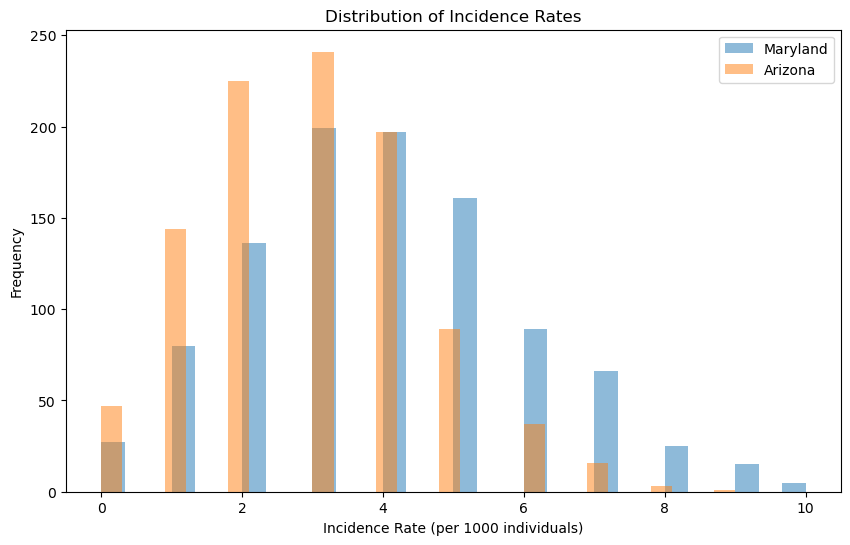

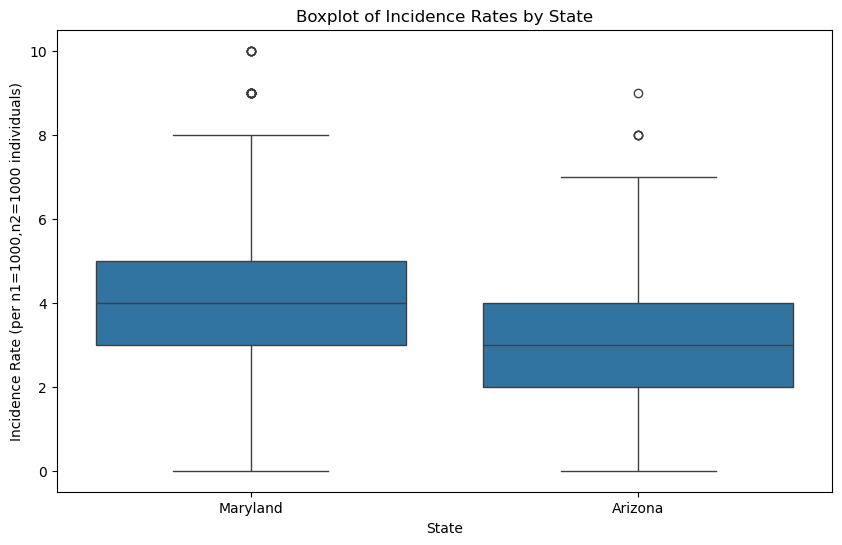

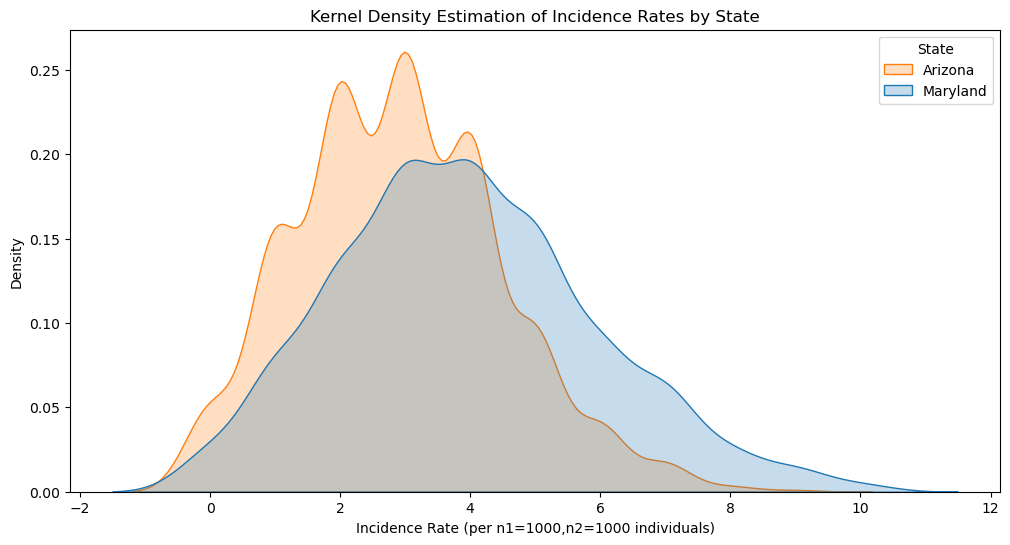

In [40]:
# likelihood ratio test
import numpy as np 
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

# seed
np.random.seed(42)
alpha = 0.05
lambda1 = 4 # incident rate per 1000 individuals in Maryland
lambda2 = 3 # incident rate per 1000 individuals in Arizona
n1, n2 = 1000, 1000 # 1000 individuals in each state

# poisson log likelihood
def poisson_likelihood(data: pd.DataFrame, mean: float) -> float:
    return np.sum(stats.poisson.logpmf(data, mean))

# generate data
def lrt_poisson_means(data1:np.ndarray, data2:np.ndarray):
    n1, n2 = len(data1), len(data2)
    mean1, mean2 = np.mean(data1), np.mean(data2)
    pooled_mean = (np.sum(data1) + np.sum(data2)) / (n1 + n2)
    
    # Log-likelihood under H0 (same mean)
    ll_h0 = poisson_likelihood(data1, pooled_mean) + poisson_likelihood(data2, pooled_mean)
    
    # Log-likelihood under H1 (different means)
    ll_h1 = poisson_likelihood(data1, mean1) + poisson_likelihood(data2, mean2)
    
    # Likelihood ratio test statistic
    lrt_stat = -2 * (ll_h0 - ll_h1)
    
    # p-value
    p_value = 1 - stats.chi2.cdf(lrt_stat, df=1)
    
    return lrt_stat, p_value

data_md = np.random.poisson(lambda1, n1)
data_az = np.random.poisson(lambda2, n2)

df = pd.DataFrame({
    'incidence': np.concatenate([data_md, data_az]),
    'state': ['Maryland']*n1 + ['Arizona']*n2
})

# Likelihood Ratio Test
lrt_stat, p_value = lrt_poisson_means(data_md, data_az)

print(f"Likelihood Ratio Test Statistic: {lrt_stat:.4f}")
print(f"p-value: {p_value:.8f}")

alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis.")
    print("There is strong evidence of a significant difference in incidence rates between Maryland and Arizona.")
else:
    print("\nWe fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.")

hist(df=df, x='incidence', hue='state', title='Distribution of Incidence Rates by State', xlabel=f'Incidence Rate (per n1={n1},n2={n2} individuals)', ylabel='Density')
box(df=df, x='state', y='incidence', title='Boxplot of Incidence Rates by State', xlabel='State', ylabel=f'Incidence Rate (per n1={n1},n2={n2} individuals)')
kde(df=df, x='incidence', hue='state', title='Kernel Density Estimation of Incidence Rates by State', xlabel=f'Incidence Rate (per n1={n1},n2={n2} individuals)', ylabel='Density')


### Ex. 1.2: Compare the mean incidence rates of a disease in Maryland and Arizona with unequal sample sizes.

The mean incidence rate in Maryland is 3.98 per 1000 individuals per year.
The mean incidence rate in Arizona is 3.20 per 1000 individuals per year.
Wald's test statistic: 3.25, with a p-value of 0.07142033.

Interpretation:
We fail to reject the null hypothesis.
There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.

Additional Analysis for Unequal Sample Sizes:
Sample size for Maryland: 1000
Sample size for Arizona: 20
Ratio of sample sizes (Maryland/Arizona): 50.00
Compare the two p-values: 0.08200473 (manual) vs. 1039.15110442 (statsmodels)

We fail to reject the null hypothesis.
There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.

Power of the test: 1.0000

Dispersion parameter: 1.0208
There is evidence of overdispersion. Consider using a Negative Binomial model instead.


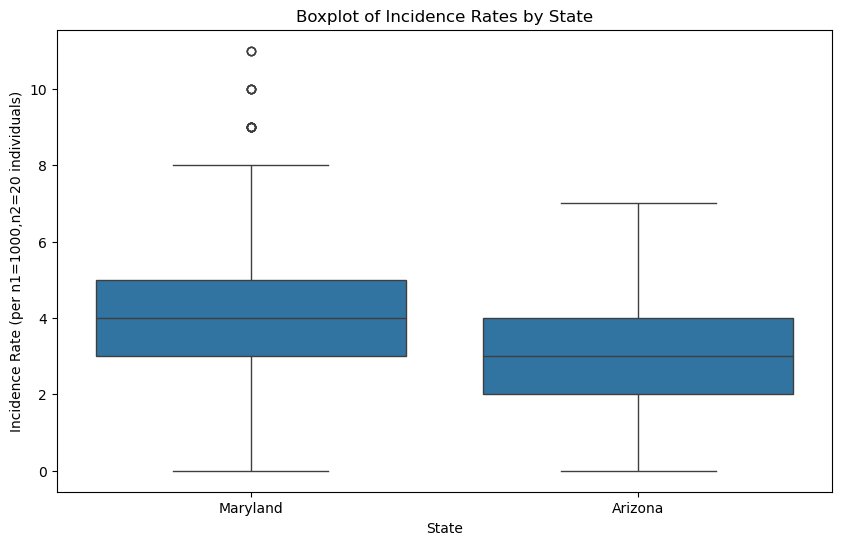

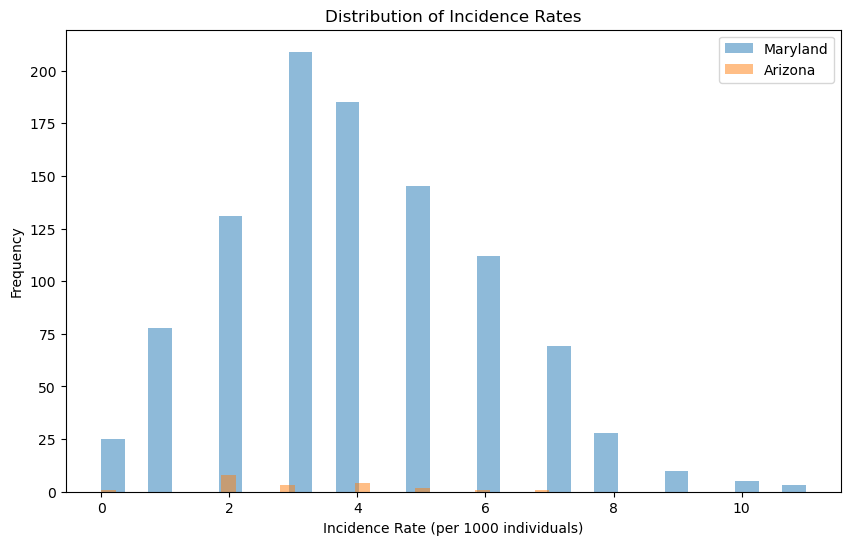

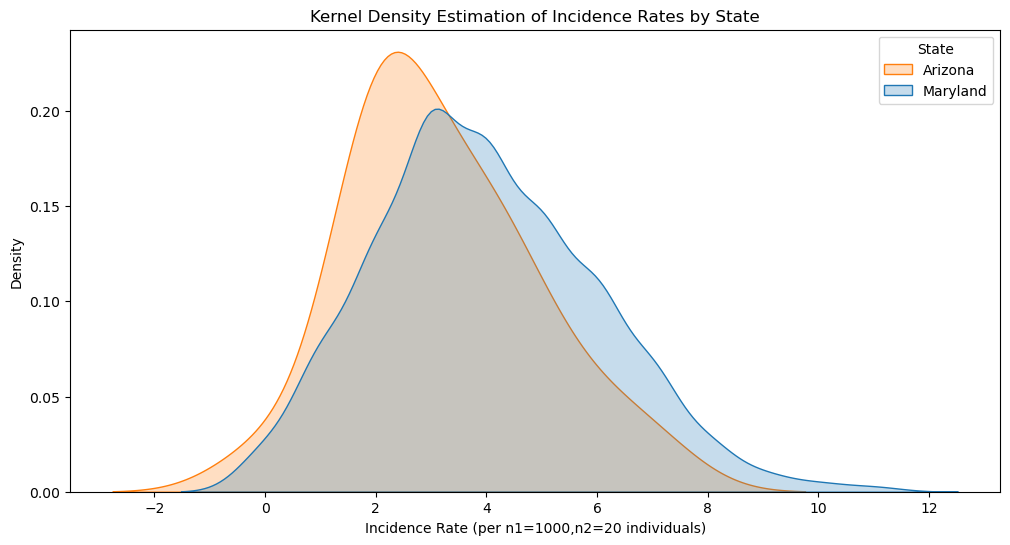

In [41]:
from statsmodels.stats.power import tt_ind_solve_power
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

n1, n2 = 1000, 20 # unequal
# same as before
data_md, data_az = np.random.poisson(lambda1, n1), np.random.poisson(lambda2, n2)

df = pd.DataFrame({
    'incidence': np.concatenate([data_md, data_az]),
    'state': ['Maryland'] * n1 + ['Arizona'] * n2
})

mean_md, mean_az = np.mean(data_md), np.mean(data_az)

# Likelihood Ratio Test
lrt_stat, p_value = lrt_poisson_means(data1=data_md, data2=data_az)

print(f"The mean incidence rate in Maryland is {mean_md:.2f} per 1000 individuals per year.")
print(f"The mean incidence rate in Arizona is {mean_az:.2f} per 1000 individuals per year.")
print(f"Wald's test statistic: {lrt_stat:.2f}, with a p-value of {p_value:.8f}.")
print("\nInterpretation:")
if p_value < alpha:
    print("We reject the null hypothesis.")
    print("There is strong evidence of a significant difference in incidence rates between Maryland and Arizona.")
else:
    print("We fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.")

print("\nAdditional Analysis for Unequal Sample Sizes:")
print(f"Sample size for Maryland: {n1}")
print(f"Sample size for Arizona: {n2}")
print(f"Ratio of sample sizes (Maryland/Arizona): {n1/n2:.2f}")

# using poisson regression
results = smf.glm(formula='incidence ~ state', data=df, family=sm.families.Poisson()).fit()

lrt_stat = results.pearson_chi2
p_value = results.pvalues[1]

print(f'Compare the two p-values: {p_value:.8f} (manual) vs. {lrt_stat:.8f} (statsmodels)')

if p_value < alpha:
    print("\nWe reject the null hypothesis.")
    print("There is strong evidence of a significant difference in incidence rates between Maryland and Arizona.")
else:
    print("\nWe fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.")

# effect size
effect_size = (mean_md - mean_az) / np.sqrt((mean_md + mean_az) / 2) # Cohen's d
# power analysis
power = tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    nobs1=n1,
    ratio=n1/n2,
    alternative='two-sided'
)
print(f"\nPower of the test: {power:.4f}")

pearson_chi2 = results.pearson_chi2
degrees_of_freedom = results.df_resid
dispersion = pearson_chi2 / degrees_of_freedom
print(f"\nDispersion parameter: {dispersion:.4f}")
if dispersion > 1:
    print("There is evidence of overdispersion. Consider using a Negative Binomial model instead.")
else:
    print("No evidence of overdispersion. The Poisson model appears appropriate.")

# boxplot/hist
box(df=df, x='state', y='incidence', title="Boxplot of Incidence Rates by State", xlabel="State", ylabel=f"Incidence Rate (per n1={n1},n2={n2} individuals)")
hist(df=df, x='incidence', hue='state', title="Distribution of Incidence Rates by State", xlabel=f"Incidence Rate (per n1={n1},n2={n2} individuals)", ylabel="Density")
kde(df=df, x='incidence', hue='state', title="Kernel Density Estimation of Incidence Rates by State", xlabel=f"Incidence Rate (per n1={n1},n2={n2} individuals)", ylabel="Density")


### Ex. 1.3: Compare the mean incidence rates of a disease in Maryland and Arizona with very small sample sizes.

The mean incidence rate in Maryland is 3.90 per 1000 individuals per year.
The mean incidence rate in Arizona is 2.75 per 1000 individuals per year.
Wald's test statistic: 1.77, with a p-value of 0.18395807.

Interpretation:
We fail to reject the null hypothesis.
There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.

Additional Analysis for Unequal Sample Sizes:
Sample size for Maryland: 10
Sample size for Arizona: 8
Ratio of sample sizes (Maryland/Arizona): 1.25
Compare the two p-values: 0.19009335 (manual) vs. 30.14685315 (statsmodels)

We fail to reject the null hypothesis.
There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.

Power of the test: 0.2940

Dispersion parameter: 1.8842
There is evidence of overdispersion. Consider using a Negative Binomial model instead.


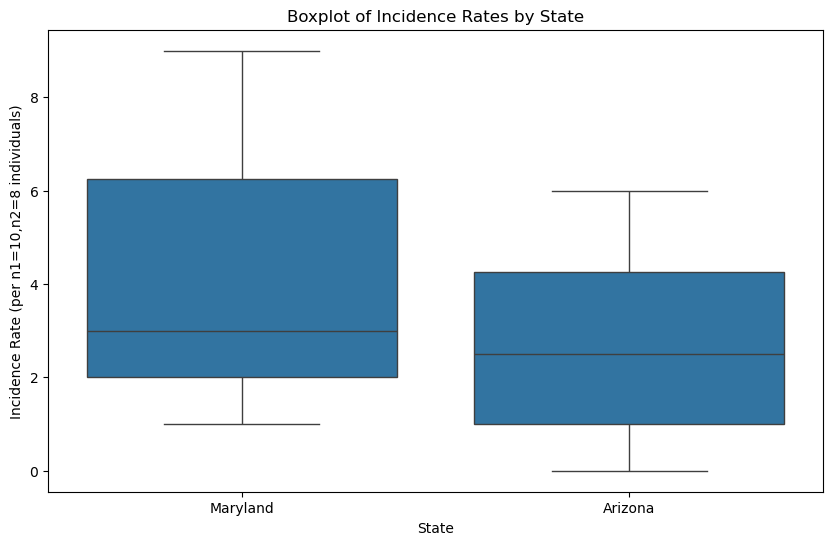

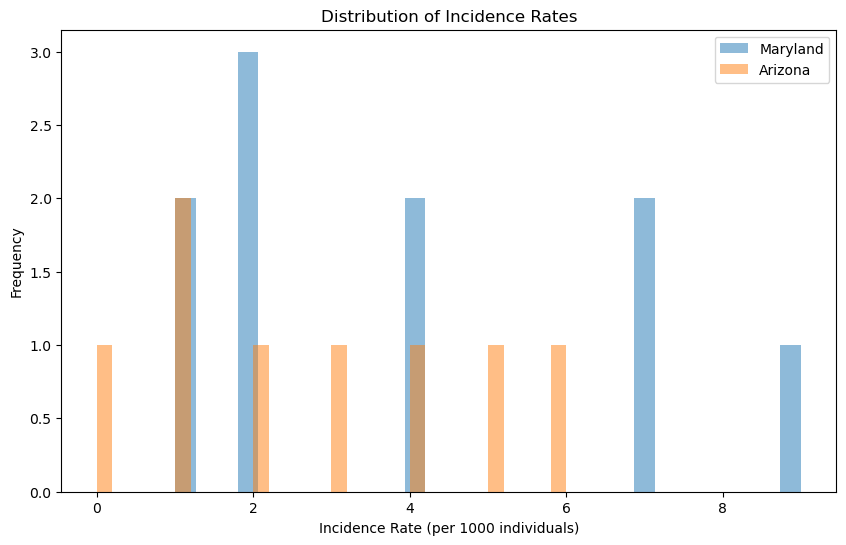

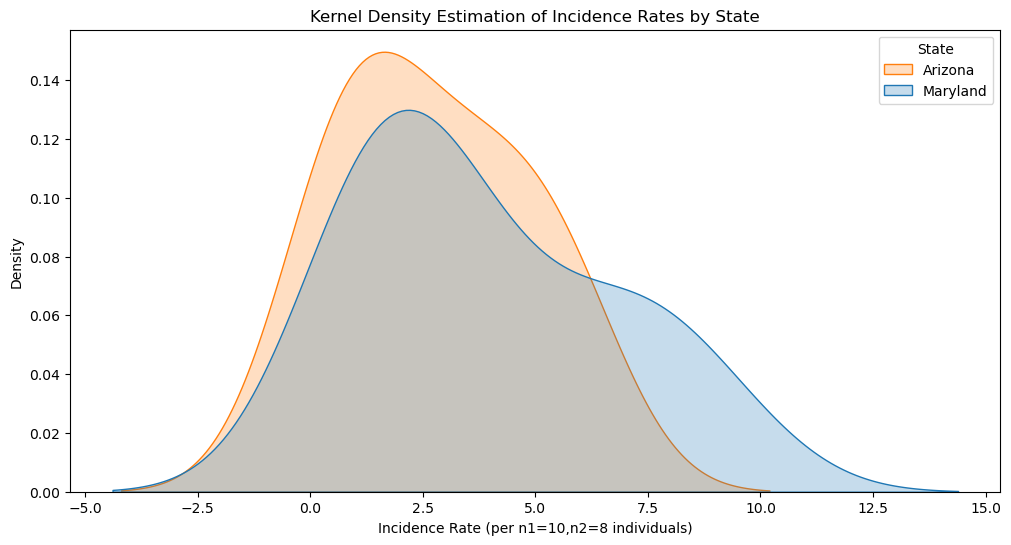

In [42]:
n1, n2 = 10, 8  # very small sample sizes
data_md, data_az = np.random.poisson(lambda1, n1), np.random.poisson(lambda2, n2)
df = pd.DataFrame({
    'incidence': np.concatenate([data_md, data_az]),
    'state': ['Maryland'] * n1 + ['Arizona'] * n2
})

# mean/std err
mean_md, mean_az = np.mean(data_md), np.mean(data_az)
se_md, se_az = np.sqrt(mean_md/n1), np.sqrt(mean_az/n2)

# Likelihood Ratio Test
lrt_stat, p_value = lrt_poisson_means(data1=data_md, data2=data_az)

print(f"The mean incidence rate in Maryland is {mean_md:.2f} per 1000 individuals per year.")
print(f"The mean incidence rate in Arizona is {mean_az:.2f} per 1000 individuals per year.")
print(f"Wald's test statistic: {lrt_stat:.2f}, with a p-value of {p_value:.8f}.")
print("\nInterpretation:")
if p_value < alpha:
    print("We reject the null hypothesis.")
    print("There is strong evidence of a significant difference in incidence rates between Maryland and Arizona.")
else:
    print("We fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.")

print("\nAdditional Analysis for Unequal Sample Sizes:")
print(f"Sample size for Maryland: {n1}")
print(f"Sample size for Arizona: {n2}")
print(f"Ratio of sample sizes (Maryland/Arizona): {n1/n2:.2f}")

# using poisson regression
results = smf.glm(formula='incidence ~ state', data=df, family=sm.families.Poisson()).fit()

lrt_stat = results.pearson_chi2
p_value = results.pvalues[1]

print(f'Compare the two p-values: {p_value:.8f} (manual) vs. {lrt_stat:.8f} (statsmodels)')

if p_value < alpha:
    print("\nWe reject the null hypothesis.")
    print("There is strong evidence of a significant difference in incidence rates between Maryland and Arizona.")
else:
    print("\nWe fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude a significant difference in incidence rates between Maryland and Arizona.")

# effect size
effect_size = (mean_md - mean_az) / np.sqrt((mean_md + mean_az) / 2) # Cohen's d
# power analysis
power = tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    nobs1=n1,
    ratio=n1/n2,
    alternative='two-sided'
)
print(f"\nPower of the test: {power:.4f}")

pearson_chi2 = results.pearson_chi2
degrees_of_freedom = results.df_resid
dispersion = pearson_chi2 / degrees_of_freedom
print(f"\nDispersion parameter: {dispersion:.4f}")
if dispersion > 1:
    print("There is evidence of overdispersion. Consider using a Negative Binomial model instead.")
else:
    print("No evidence of overdispersion. The Poisson model appears appropriate.")

# boxplot/hist
box(df=df, x='state', y='incidence', title="Boxplot of Incidence Rates by State", xlabel="State", ylabel=f"Incidence Rate (per n1={n1},n2={n2} individuals)")
hist(df=df, x='incidence', hue='state', title="Distribution of Incidence Rates by State", xlabel=f"Incidence Rate (per n1={n1},n2={n2} individuals)", ylabel="Density")
kde(df=df, x='incidence', hue='state', title="Kernel Density Estimation of Incidence Rates by State", xlabel=f"Incidence Rate (per n1={n1},n2={n2} individuals)", ylabel="Density")


## Simulation Study

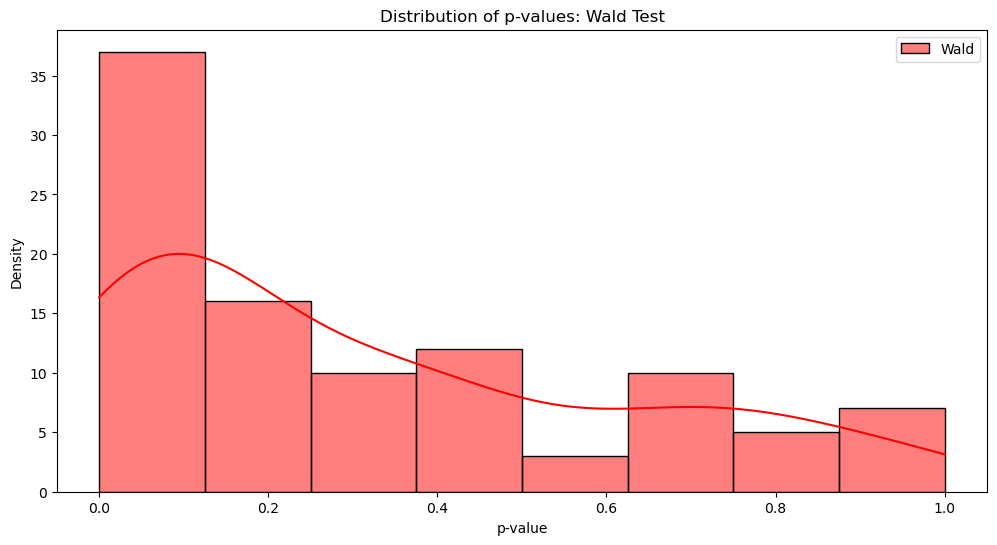

In [50]:
n1, n2 = 10, 10  # equal sample sizes
data_md, data_az = np.random.poisson(lambda1, n1), np.random.poisson(lambda2, n2)

df = pd.DataFrame({
    'incidence': np.concatenate([data_md, data_az]),
    'state': ['Maryland'] * n1 + ['Arizona'] * n2
})

# mean/std err
mean_md, mean_az = np.mean(data_md), np.mean(data_az)
se_md, se_az = np.sqrt(mean_md/n1), np.sqrt(mean_az/n2)

# Likelihood Ratio Test
num_sim = 100
lrt_results = []

for _ in range(num_sim): 
    data_md, data_az = np.random.poisson(lambda1, n1), np.random.poisson(lambda2, n2)
    lrt_stat, p_value = lrt_poisson_means(data1=data_md, data2=data_az)
    lrt_results.append(p_value)

plot_pvalues(results=lrt_results)



--- 

#### References

- [8.4.5 Likelihood Ratio Tests](https://www.probabilitycourse.com/chapter8/8_4_5_likelihood_ratio_tests.php)

- [Likelihood Ratio Tests](https://sites.warnercnr.colostate.edu/gwhite/wp-content/uploads/sites/73/2017/04/LikelihoodRatioTests.pdf) 

- [Illustrate deriving the likelihood ratio test for rate of Poisson](https://mediaspace.baylor.edu/media/Illustrate+deriving+the+likelihood+ratio+test+for+rate+of+Poisson/1_blh70yxu)

- [Likelihood ratio test - introduction](https://www.youtube.com/watch?v=Tn5y2i_MqQ8&list=PLwJRxp3blEvb7P-7po9AxuBwquPv75LjU&index=47)

- [L2.3 LR, Wald, and Score Tests](https://www.youtube.com/watch?v=6N-dvmth5JI)